In [126]:
from nltk.corpus import brown

#### 导入语料库,下面以brown语料库为例讲解

#### 语料库中的文件brown.fileids()

In [127]:
b_f = brown.fileids()

In [128]:
type(b_f)

list

In [129]:
b_f[:3]

['ca01', 'ca02', 'ca03']

In [130]:
len(b_f)

500

#### 语料库的分类brown.categories()

In [131]:
b_c = brown.categories()
b_c

['adventure',
 'belles_lettres',
 'ca01',
 'ca02',
 'ca03',
 'ca04',
 'ca05',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

#### 语料库中每个分类的文件brown.fileids(brown.categories())

In [132]:
b_f[0]

'ca01'

In [133]:
#brown.fileids(b_c[:1])

#### 对应文件和分类中原始内容。参数可以式空

In [134]:
#brown.raw(categories=brown.categories()[:])#	对应分类中原始内容。参数可以式空

In [135]:
#brown.raw(fileids=[b_f[0],b_f[1]])#	对应文件中原始内容。参数可以式空

In [136]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [137]:
brown.sents()

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

#### brown.abspath(fileid=filestr)查找语料文件绝对路径

In [138]:
brown.abspath(fileid=brown.fileids()[1])

FileSystemPathPointer('C:\\nltk_data\\corpora\\brown\\ca02')

#### brown.encoding(file=filestr)查看某个文件的编码方式

In [139]:
brown.encoding(file=brown.fileids()[1])

'ascii'

#### brown.open(file=filestr)	打开文件流

In [140]:
f = brown.open(file=brown.fileids()[1])

#### brown.readme()文件内容

In [141]:
brown.readme()

'BROWN CORPUS\n\nA Standard Corpus of Present-Day Edited American\nEnglish, for use with Digital Computers.\n\nby W. N. Francis and H. Kucera (1964)\nDepartment of Linguistics, Brown University\nProvidence, Rhode Island, USA\n\nRevised 1971, Revised and Amplified 1979\n\nhttp://www.hit.uib.no/icame/brown/bcm.html\n\nDistributed with the permission of the copyright holder,\nredistribution permitted.\n'

In [149]:
import nltk
nltk.Text(tokens=brown.fileids()[0])

<Text: c a 0 1...>

In [158]:
from nltk.corpus import gutenberg
gutenberg.fileids()[:3]

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt']

In [159]:
emma= gutenberg.words('austen-emma.txt')
#print(gutenberg.raw('austen-emma.txt'))
emma = nltk.Text(emma)#
print(emma[:10])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']


In [160]:
from nltk.corpus import webtext #网络体语料库

In [161]:
for fileid in webtext.fileids():
    print(fileid,webtext.raw(fileid)[:50])

firefox.txt Cookie Manager: "Don't allow sites that set remove
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Who
overheard.txt White guy: So, do you have any plans for this even
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted
singles.txt 25 SEXY MALE, seeks attrac older single lady, for 
wine.txt Lovely delicate, fragrant Rhone wine. Polished lea


In [168]:
from nltk.corpus import nps_chat #聊天体语料库
fileids = nps_chat.fileids()
chatroom = nps_chat.posts(fileids[0])
chatroom[:1]

[['now', 'im', 'left', 'with', 'this', 'gay', 'name']]

#### 使用brown语料库计算不同情态动词用法

In [170]:
news = brown.words(categories='news')
fdist = nltk.FreqDist([w.lower() for w in news])
modals= ['can','could','may','might','must','will']
for m in modals:
    print(m,':',fdist[m])

can : 94
could : 87
may : 93
might : 38
must : 53
will : 389


In [176]:
from nltk.corpus import reuters
reuters.fileids()[:2]#['test/14826', 'test/14828']
reuters.categories()[:2]#['acq', 'alum']

['acq', 'alum']

In [184]:
from nltk.corpus import inaugural
list(f[:20]for f in inaugural.fileids())[:1]#['1789-Washington.txt']

['1789-Washington.txt']

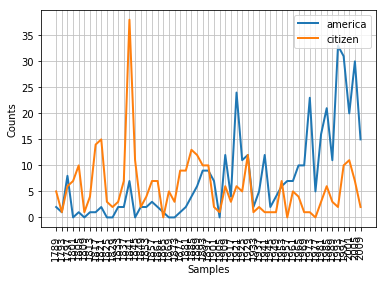

In [186]:
#下面体现American和citizen随时间推移使用情况
cfd = nltk.ConditionalFreqDist((target,fileid[:4]) for fileid in inaugural.fileids() for w in inaugural.words(fileid) for target in ['america','citizen'] if w.lower().startswith(target))
cfd.plot()

In [191]:
from nltk.corpus import stopwords
#定义一个计算func计算不在停用词列表中的比例的函数
def content(text):
    stopwords_eng = stopwords.words('english')
    content = [w for w in text if w.lower() and w not in stopwords_eng]
    return len(content)/len(text)
print(content(nltk.corpus.reuters.words()))

0.7605545002298215


#### 就两部分组成，男性和女性的英文名字。这里我们研究一下最后一个名字最后一个字母和性别的关系

['female.txt', 'male.txt']


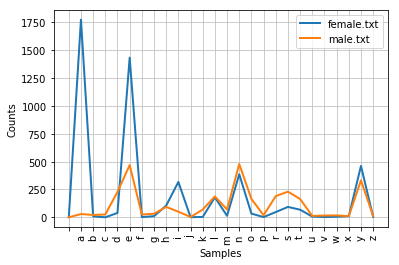

In [192]:
names = nltk.corpus.names
print(names.fileids())
male = names.words('male.txt')
female = names.words('female.txt')
cfd = nltk.ConditionalFreqDist((fileid,name[-1]) for fileid in names.fileids() for name in names.words(fileid))
cfd.plot()

#### 发音词典

In [194]:

s = ['N','IHO','K','S']
entries = nltk.corpus.cmudict.entries()
print('Example:',entries[0])
word_list = [word for word,pron in entries if pron[-4:]==s]
print(word_list)

Example: ('a', ['AH0'])
[]


In [196]:
def func(pron):
    return [char for phone in pron for char in phone if char.isdigit()]
word_list = [w for w,pron in entries if func(pron)==['0','1','0','2','0']]
#print(word_list)

#### WordNnet词典

In [197]:
from nltk.corpus import wordnet as wn
wn.synsets("motorcar")#motorcar和automobile是同义词，可以借助wordnet来研究。

[Synset('car.n.01')]

说明motorcar 只有一个 可能的含义。car.n.01被称为“同义 词集 ”。我们可以通过wn.synset(‘car.n.01‘).lemma_names 来查看当前同义词集的其他词 (car这个单词就有很多个同义词集了) 。wn.synset(‘car.n.01‘).examples 和wn.synset(‘car.n.01‘).definition 可以分别查看定义和例子（但是Python3里面不可以。）

In [205]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [206]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [207]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

而类似car.n.01.car这样的处于下一级的称之为词条。
对于词条级别的obj，可以看下面的操作。

In [211]:
wn.synset('car.n.01').lemmas

<bound method Synset.lemmas of Synset('car.n.01')>

In [212]:
wn.lemma('car.n.01.automobile').name()

'automobile'

In [213]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

#### 上位词、下位词、反义词
上位词（hypernym），指概念上外延更广的主题词。 例如：”花”是”鲜花”的上位词，”植物”是”花”的上位词，”音乐”是”mp3”的上位词。反过来就是下位词了。
上位词和下位词通过hyponyms() 和 root_hypernyms() 来访问。

In [216]:
motorcar = wn.synset('car.n.01').hyponyms()#下位词
car = wn.synset('car.n.01').root_hypernyms()
car

[Synset('entity.n.01')]

反义词就通过antonyms() 来访问

#### 其他词集关系
之前是从上->到下，或者反过来。更重要的是从整体->局部，或者反过来。如大树和树冠、树干的关系，这些是part_meronyms() 。而大树集合就成了森林，member_holonyms() 。而树的实质是心材和边材组成，即substance_meronyms()。

#### 语义相似度
当两个单词有相同的上位词（在词树中寻找），而若上位词恰好属于较低层，那么它们会有一定密切联系。

In [217]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
print(right.lowest_common_hypernyms(orca))

[Synset('whale.n.02')]


当然，类似于树的结构中总是有神的，可以通过min_depth() 来查看一个synset的最小深度。基于这些，我们可以在0-1的范围内返回相似度。对于上面的代码，查看相似度：right.path_similarity(orca)。

这些数字大小意义不大。但是当鲸鱼和鲸鱼、鲸鱼和小说来比较时，数字是减小的。对比着看大小，还是有意义的。